# Анализ достпных данных и построение минимальной базовой линии

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip3 install ipympl

In [3]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data_address = 'gdrive/MyDrive/Pump Data'

In [5]:
training_raw = pd.read_csv(data_address +'/cfp_dataset_v1.csv', index_col=False)
training_raw.drop(['Unnamed: 0', 'MIDUPT1138P2300058', 'SHORTUPT1138P2300058', 'LONGUPT1138P2300058'], axis=1, inplace=True)

In [6]:
training_raw.columns

Index(['WELL_ID', 'UUID', 'DT', 'UNIXDT', 'T1138P6000096', 'T1138P6000315',
       'DMIDT1138P4000064', 'DSHORTT1138P4000064', 'DLONGT1138P4000064',
       'DMIDT1138P2600012', 'DSHORTT1138P2600012', 'DLONGT1138P2600012',
       'DMIDT1205P2300000', 'DSHORTT1205P2300000', 'DLONGT1205P2300000',
       'T1205P2300000', 'T1138P4000064', 'T1138P2600012', 'T1138P600050',
       'T1013P500399', 'DMIDT1138P2300058', 'DSHORTT1138P2300058',
       'DLONGT1138P2300058'],
      dtype='object')

In [7]:
len(training_raw.columns)

23

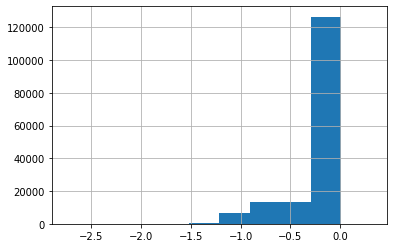

In [8]:
training_raw.DSHORTT1138P2300058.hist()

сколько всего есть скважин и UUID

In [9]:
training_raw.WELL_ID.value_counts()

226000297    9998
226002142    9997
226002627    9992
226003330    9990
226001846    9990
226001947    9987
226002861    9987
226003316    9987
226002416    9982
226000198    9981
226000188    9975
226002603    9706
226002307    9607
226003080    9600
226003074    9578
226002998    8725
226002148    3180
Name: WELL_ID, dtype: int64

In [10]:
len(training_raw.WELL_ID.value_counts())

17

In [11]:
training_raw.UUID.value_counts()

226002142030114300    1
226000297030574200    1
226002603029783400    1
226002148030726300    1
226001947030298800    1
                     ..
226002627031015500    1
226001947030486900    1
226003316030143700    1
226002603029137800    1
226003316028872300    1
Name: UUID, Length: 160262, dtype: int64

In [12]:
training_raw.groupby('WELL_ID')['DSHORTT1138P2300058'].mean()

WELL_ID
226000188   -0.158012
226000198   -0.191680
226000297   -0.216085
226001846   -0.192431
226001947   -0.021665
226002142   -0.210095
226002148   -0.054385
226002307   -0.042508
226002416   -0.113366
226002603   -0.009723
226002627   -0.121966
226002861   -0.093735
226002998   -0.063499
226003074   -0.230264
226003080   -0.201001
226003316   -0.331752
226003330   -0.193445
Name: DSHORTT1138P2300058, dtype: float64

In [13]:
only_1_bad = training_raw[training_raw['WELL_ID'] == 226003316].copy()
only_1_bad.sort_values('DT', inplace=True)

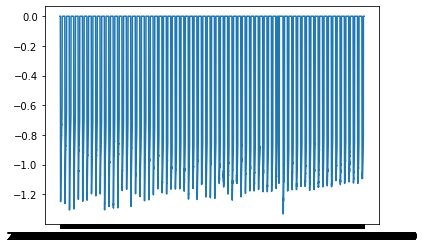

In [14]:
t = only_1_bad.DT
target = only_1_bad.DSHORTT1138P2300058
v1 = only_1_bad.DMIDT1138P4000064

plt.plot(t, target)
plt.show()


In [15]:
import matplotlib.dates as dts

In [16]:
columns_to_plot = ['T1138P6000096', 'T1138P6000315',
       'DMIDT1138P4000064', 'DSHORTT1138P4000064', 'DLONGT1138P4000064',
       'DMIDT1138P2600012', 'DSHORTT1138P2600012', 'DLONGT1138P2600012',
       'DMIDT1205P2300000', 'DSHORTT1205P2300000', 'DLONGT1205P2300000',
       'T1205P2300000', 'T1138P4000064', 'T1138P2600012', 'T1138P600050',
       'DMIDT1138P2300058', 'DSHORTT1138P2300058',
       'DLONGT1138P2300058']

In [17]:
training_raw['DT'][:600]

0      2019-07-31 23:55:00
1      2019-07-31 23:50:00
2      2019-07-31 23:45:00
3      2019-07-31 23:40:00
4      2019-07-31 23:35:00
              ...         
595    2019-07-29 22:20:00
596    2019-07-29 22:15:00
597    2019-07-29 22:10:00
598    2019-07-29 22:05:00
599    2019-07-29 22:00:00
Name: DT, Length: 600, dtype: object

In [18]:
only_1_bad.head()

,WELL_ID,UUID,DT,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,DSHORTT1138P2600012,DLONGT1138P2600012,DMIDT1205P2300000,DSHORTT1205P2300000,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050,T1013P500399,DMIDT1138P2300058,DSHORTT1138P2300058,DLONGT1138P2300058
19976,226003316,226003316028536000,2019-06-27 06:40:00,1561617600,0,20700,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,-0.920438,0.0,-0.934417
19975,226003316,226003316028536300,2019-06-27 06:45:00,1561617900,0,21000,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,-0.920438,0.0,-0.934417
19974,226003316,226003316028536600,2019-06-27 06:50:00,1561618200,0,21300,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,-0.920438,0.0,-0.934417
19973,226003316,226003316028536900,2019-06-27 06:55:00,1561618500,0,21600,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,-0.920438,0.0,-0.934417
19972,226003316,226003316028537200,2019-06-27 07:00:00,1561618800,0,21900,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,-0.920438,0.0,-0.934417


In [19]:
only_1_bad.set_index('DT', inplace=True)
only_1_bad.index = pd.to_datetime(only_1_bad.index)

In [20]:
only_1_bad.index

DatetimeIndex(['2019-06-27 06:40:00', '2019-06-27 06:45:00',
               '2019-06-27 06:50:00', '2019-06-27 06:55:00',
               '2019-06-27 07:00:00', '2019-06-27 07:05:00',
               '2019-06-27 07:10:00', '2019-06-27 07:15:00',
               '2019-06-27 07:20:00', '2019-06-27 07:25:00',
               ...
               '2019-07-31 23:10:00', '2019-07-31 23:15:00',
               '2019-07-31 23:20:00', '2019-07-31 23:25:00',
               '2019-07-31 23:30:00', '2019-07-31 23:35:00',
               '2019-07-31 23:40:00', '2019-07-31 23:45:00',
               '2019-07-31 23:50:00', '2019-07-31 23:55:00'],
              dtype='datetime64[ns]', name='DT', length=9987, freq=None)

In [21]:
import matplotlib as mtl


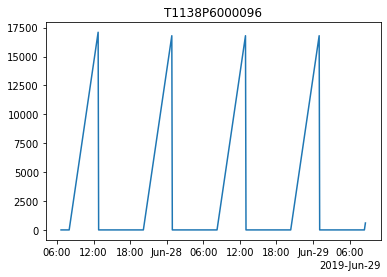

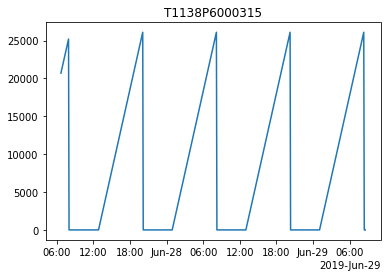

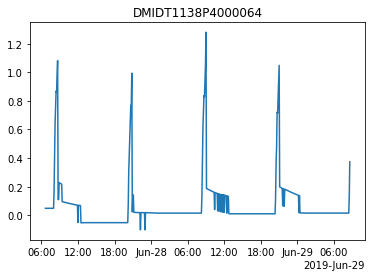

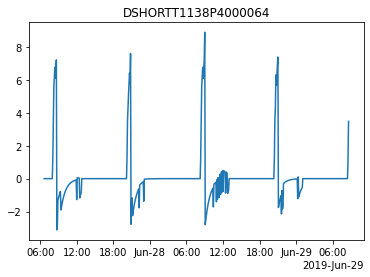

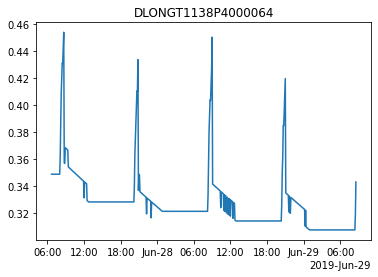

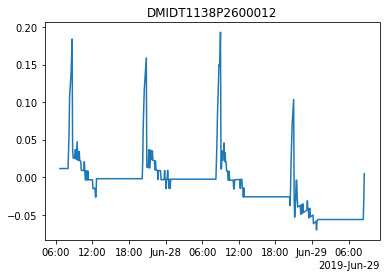

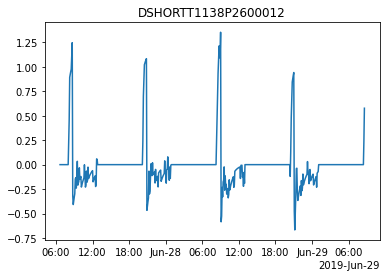

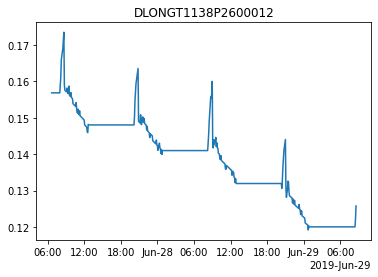

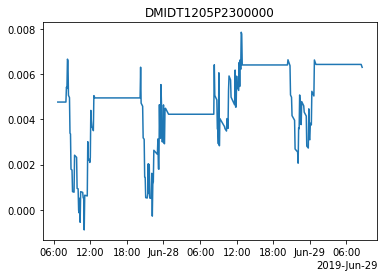

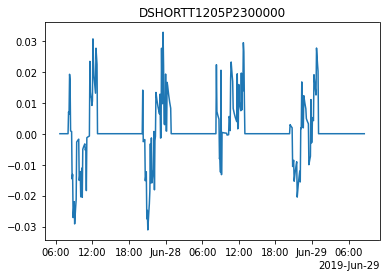

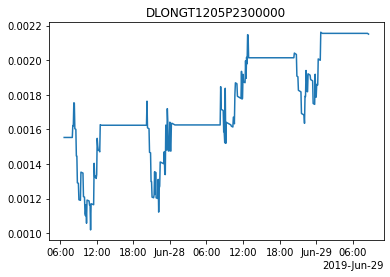

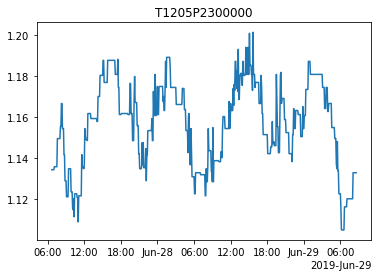

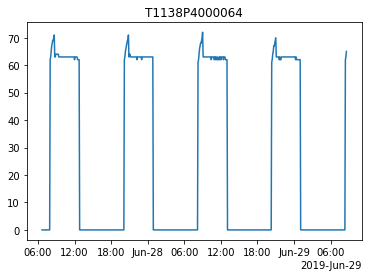

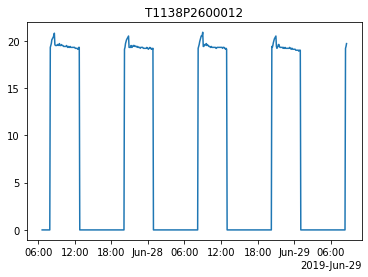

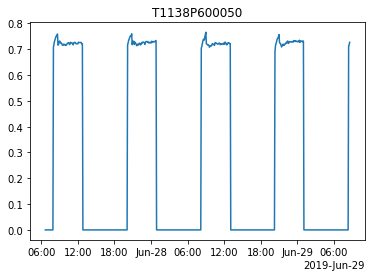

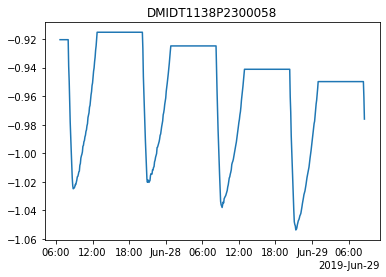

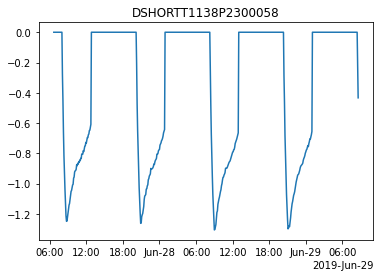

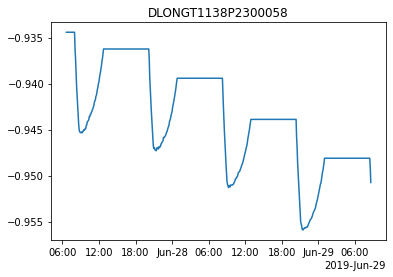

In [22]:

pos = 0

for name in columns_to_plot:
    fig, ax = plt.subplots()
    ax.plot([*only_1_bad.index][:600],  only_1_bad[name][:600])

    locator = dts.AutoDateLocator(minticks=3, maxticks=10)
    formatter = dts.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_title(name)

plt.show()
plt.close()
